# Importing Required Modules

In [4]:
!pip install inline folium
!pip install inline beautifulsoup4
!pip install inline lxml
!pip install inline requests
!pip install inline geocoder
!pip install --upgrade tensorflow
import numpy as np
import pandas as pd
import matplotlib as plt
import json
import sklearn.cluster as KMeans
from bs4 import BeautifulSoup
import requests
import csv
from geopy.geocoders import Nominatim 
# convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

Requirement already up-to-date: tensorflow in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.13.1)
Requirement not upgraded as not directly required: absl-py>=0.1.6 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow) (0.7.1)
Requirement not upgraded as not directly required: grpcio>=1.8.6 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow) (1.21.1)
Requirement not upgraded as not directly required: termcolor>=1.1.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow) (1.1.0)
Requirement not upgraded as not directly required: gast>=0.2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow) (0.2.2)
Requirement not upgraded as not directly required: tensorflow-estimator<1.14.0rc0,>=1.13.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow) (1.13.0)
Requirement not upgraded as not directly required: keras-applications>=1.0.6 in /opt/conda/envs/DSX-Pyt

# Data

##### To analyze and predict what location and type would be best for building or investing in a restaurant we are going to require a number of information:
##### 1. The venues and buildings around Ottawa, this will be provided by the FourSquare API
##### 2. I amgoing to require key feautures that allow for a restuarant to be successful, this will be provided by 'the balance of small business'
##### 3. User 'u/serenerdy' from reddit made a dataset for Ethnic resturants and the types they are that will also be utliziled where neccesary
##### 4. I am also using Open Data Ottawa for infomation about neighborhoods, there population and corresponding IDs for segmentation

In [5]:
# The code was removed by Watson Studio for sharing.

# Ethnic Restaurant Data
#### This dataset has extensice information about the type of Restaurant, Location, What type it is, and notes about the resturant
#### which will aid the FourSqaure API data

In [6]:
df = pd.read_excel(data,'Ethnic Restaurants')
df.head(11)

,Restaurant,Area,Location,Venue type,Ethnic Fare,Price,Recommendations/Notes,Link to site,Phone
0,7e Oeil,Ottawa East,2-411 McArthur,Sit-Down/Delivery,Afro-Caribbean,DIY,NaN,https://www.facebook.com/7oeil.caribean.food/,NaN
1,Aahar the Taste of India,Ottawa East / West,727 Churchill (west)\n1573 Alta Vista (east),Sit-Down,Indian,DIY,NaN,http://www.aahar.ca/,NaN
2,Adam's Sausage Factory,Ottawa East,1437 Michael St.,Deli,Polish Deli,DIY,NaN,http://www.adamssausages.com/,NaN
3,Ahora,Downtown Ottawa,307 Dalhousie,Sit-Down,Tex/Mex,DIY,NaN,http://www.ahora.ca/,NaN
4,Aiyara Thai,Ottawa South,1590 Walkley Road,Sit-Down,Thai,DIY,"Gorgeous décor, Pineapple Rice dish recommended",https://www.aiyarathaicuisine.ca/,NaN
5,Alirang,Downtown Ottawa,134 Nelson st,Sit-Down,Korean,DIY,"Bibimbap, Bulgogi recommended",https://www.yelp.ca/biz/alirang-hamilton,NaN
6,Ariana Kebab,Downtown / Ottawa South,2677 Alta Vista dr. (south)\n 424 Rideau st (d...,Sit-Down,Afghani,DIY,NaN,http://www.arianakababhouse.com/,NaN
7,Asian Stars,Ottawa West,1380 Clyde ave,Sit-Down,Variety of Asian,DIY,Vegan options available,http://asianstarsrestaurant.com/index.html,NaN
8,Baan Thai,Ottawa West,261 Centerpoint dr.,Sit-Down,Thai,DIY,Smaller location- limited seating,https://baanthairestaurantottawa.ca/,NaN
9,Bienvenidos,Ottawa East,1731 St.Laurent Blvd,Market / Grocer,Latin,DIY,"Empanadas, pupusas, tamales recommended",http://www.bienvenidoslatinmarket.ca/,NaN


# Neighborhood Data, there names and the association Area, Population and ID
##### This dataset was gathered from Ottawa Open Data

In [7]:
body = client_0c91842efc1a45b2b53a6830d9c94262.get_object(Bucket='datascience-donotdelete-pr-mrcxrdfxydb92m',Key='onsboundariesgen1v2.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
df_2 = pd.read_csv(body, encoding='latin-1')
df_2.head(11)

,ONS_ID,Name,Name_FR,Cen2011POP
0,1,Barrhaven,,17250
1,2,Bayshore - Belltown,,8060
2,3,Beacon Hill South - Cardinal Heights,Côte Beacon Sud - Cardinal Heights,7305
3,4,Beaverbrook,,5180
4,5,Beechwood Cemetery,Cimetière Beechwood,451
5,6,Bells Corners East,Bells Corners Est,5110
6,7,Bells Corners West,Bells Corners Ouest,4355
7,8,Billings Bridge - Alta Vista,Pont Billings - Alta Vista,11880
8,9,Blackburn Hamlet,,8260
9,10,Borden Farm - Stewart Farm - Parkwood Hills - ...,Ferme Borden - Ferme Stewart - Côtes Parkwood ...,10135


# Foursquare API will be used to segment areas of Ottawa, to gather venue ratings and other analysis

In [8]:
CanData = client_0c91842efc1a45b2b53a6830d9c94262.get_object(Bucket='datascience-donotdelete-pr-mrcxrdfxydb92m',Key='CanData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(CanData, "__iter__"): CanData.__iter__ = types.MethodType( __iter__, CanData )

df_data_2 = pd.read_csv(CanData)
df_data_2.head(11)

,PostCode,Number,Street,City,Province,Latitude,Longitude,Street Name,Type,Direction,Confidence,aType,Unit,Count
0,A0A0A0,5050,BOUL,GANDER,NL,48.951481,-54.598466,BOUL,NaN,NaN,0.7,NonRES,NaN,1
1,A0A0A0,1,RIVIERES-AUX-RATS RIVIERES-AUX-RATS,GANDER,NL,48.944681,-54.603941,RIVIERES-AUX-RATS RIVIERES-AUX-RATS,NaN,NaN,0.5,NonRES,NaN,1
2,A0A0A0,212,BACKLINE,GOULDS,NL,47.461077,-52.783660,BACKLINE,NaN,NaN,0.8,NonRES,NaN,1
3,A0A0A0,10531,90,HARBOUR MAIN,NL,47.333667,-53.229613,90,NaN,NaN,0.7,NonRES,NaN,1
4,A0A0A0,105,HARBOUR DR,HARBOUR MAIN,NL,47.451616,-53.155142,HARBOUR,DR,NaN,0.8,NonRES,NaN,1
5,A0A0A0,2,Island Five Island Lake,Hubley,NS,44.670146,-63.791370,ISLAND FIVE ISLAND LAKE,NaN,NaN,0.7,NonRES,NaN,1
6,A0A0A0,30,ELLINGTON CLOSE,PARADISE,NL,47.516229,-52.900158,ELLINGTON,CLOSE,NaN,0.7,NonRES,NaN,1
7,A0A0A0,1,Harold Whynot RD,Pine Grove,NS,44.404651,-64.534003,Harold Whynot,RD,NaN,0.8,NonRES,NaN,1
8,A0A0A0,16,MAIN STREET,ST. JOHNS,NL,47.486684,-52.767846,MAIN,ST,NaN,0.5,NonRES,NaN,1
9,A0A0A0,179,NORTHERN POND ROAD,ST. JOHNS,NL,47.478297,-52.872123,NORTHERN POND,RD,NaN,0.6,NonRES,NaN,1


In [9]:
ot = df_data_2.loc[df_data_2['City'] == 'Ottawa']
ot.head(11)

,PostCode,Number,Street,City,Province,Latitude,Longitude,Street Name,Type,Direction,Confidence,aType,Unit,Count
1182625,E5C1H3,1,Canal,Ottawa,NB,45.426394,-75.697966,CANAL,NaN,NaN,1.0,NonRES,NaN,1
4887322,J1K0A8,70,Landry RUE,Ottawa,QC,45.495965,-75.664502,Landry,RUE,NaN,0.7,NonRES,NaN,1
6471469,K0A0A0,106,Giroux,Ottawa,ON,45.439992,-75.390865,GIROUX,NaN,NaN,0.8,NonRES,NaN,1
6471470,K0A0A0,106,Giroux St,Ottawa,ON,45.490845,-75.663550,Giroux,ST,NaN,0.7,NonRES,NaN,1
6471471,K0A0A0,106,Giroux St Ottawa Ontario,Ottawa,ON,45.428647,-75.663596,GIROUX ST OTTAWA ONTARIO,NaN,NaN,0.7,NonRES,NaN,1
6471473,K0A0A1,154,BRANTHAVEN ST,Ottawa,ON,45.451059,-75.475486,BRANTHAVEN,ST,NaN,1.0,NonRES,NaN,1
6471476,K0A0A9,1090,Redtail Pr,Ottawa,ON,45.432208,-75.633976,REDTAIL PR,NaN,NaN,0.9,NonRES,NaN,1
6471477,K0A0B0,1,ASHTON STATION ROAD,Ottawa,ON,45.174193,-76.053861,ASHTON STATION,RD,NaN,0.8,NonRES,NaN,1
6471479,K0A0B1,99900,PO Box,Ottawa,ON,45.418459,-75.644416,PO BOX,NaN,NaN,0.8,NonRES,NaN,1
6471488,K0A0G0,485,RICHMOND ROAD UNIT908,Ottawa,ON,45.389159,-75.761143,RICHMOND ROAD UNIT908,NaN,NaN,1.0,NonRES,NaN,1


In [12]:
address = 'Ottawa, ON'
geolocator = Nominatim(user_agent="ottawa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ottawa are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ottawa are 45.2603984, -75.8082383.


In [23]:
map_ot = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(ot['Latitude'], ot['Longitude'], ot['Street'], df_2['Name']):
    label = '{}, {}'.format('Street', 'Name')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ot)  
    
map_ot

In [36]:
CLIENT_ID = '02MEQJ5NF2YCLVX0I3AHRXK2Q1XTWCOW2KKFSVFDV5KDR4I4'
CLIENT_SECRET = 'OPV0N2CCVJ5GOBINLQ03TCNMMHWHIWQBQE5EZ1SH3R2ZUR0Z'
VERSION = '20180605' # Foursquare API version

In [ ]:
import json
from pandas.io.json import json_normalize
ot.loc[6471469,'Street']
Street_latitude = ot.loc[6471469,'Latitude'] # neighborhood latitude value
Street_longitude = ot.loc[6471469,'Longitude'] # neighborhood longitude value
Street_name = ot.loc[6471469,'Street'] # neighborhood name

LIMIT = 100
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Street_latitude, 
    Street_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

#Function for getting venues in Ottawa
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#Making a Dataframe of the Venues
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

# Data Analysis

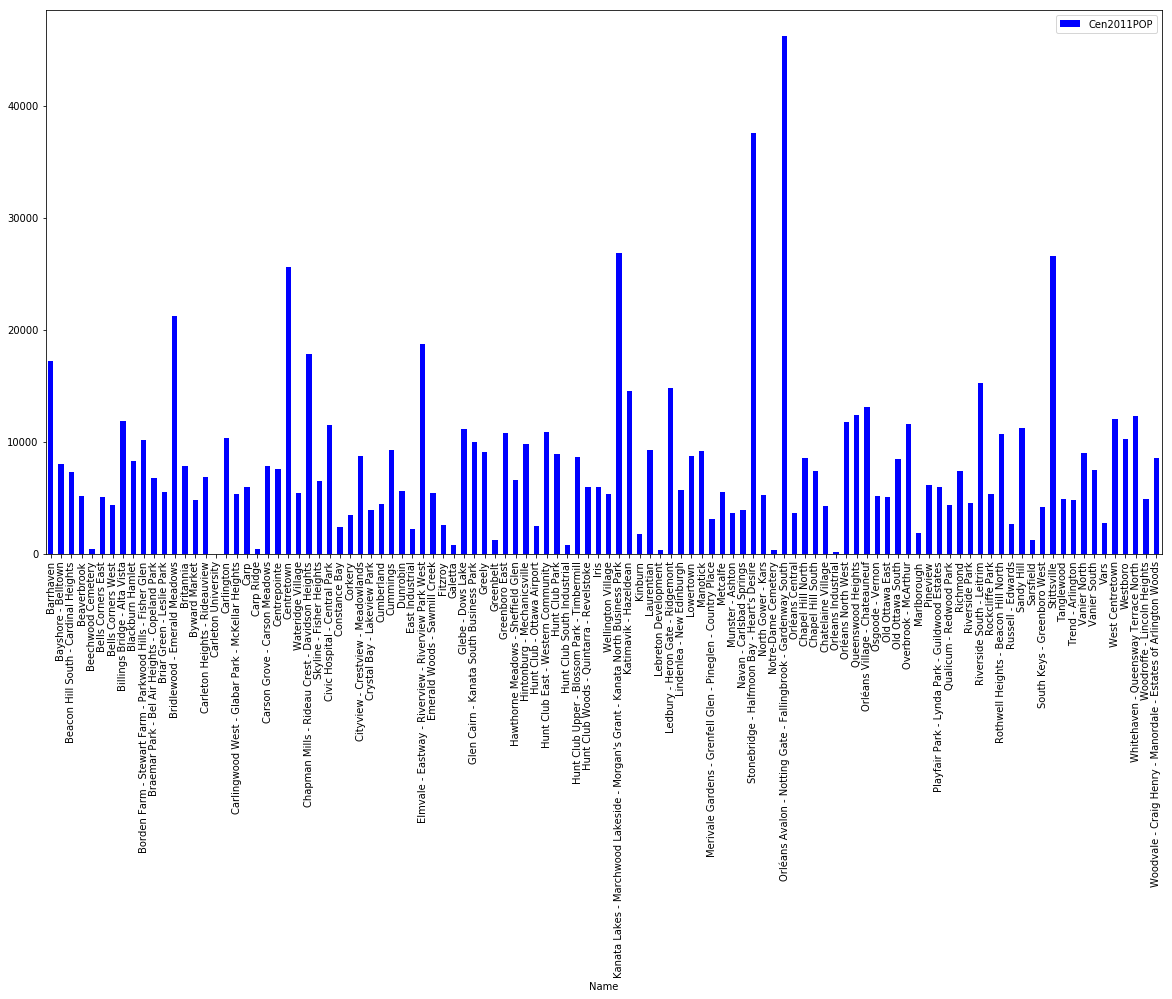

In [69]:
# Most Populated Areas in Ottawa 
import random
import matplotlib.pyplot as plt
h = df_2.plot(kind='bar',x='Name',y='Cen2011POP',color= 'blue' , width=0.5, figsize=(20, 10))
plt.show()


In [74]:
#Areas with the highest population
df_2.nlargest(10, 'Cen2011POP')                  

,ONS_ID,Name,Name_FR,Cen2011POP
71,72,Orléans Avalon - Notting Gate - Fallingbrook -...,Orléans Avalon - Notting Gate - Fallingbrook -...,46240
68,69,Stonebridge - Halfmoon Bay - Heart's Desire,,37625
55,56,Kanata Lakes - Marchwood Lakeside - Morgan's G...,Lacs Kanata- Marchwood Lakeside - Morgan's Gra...,26880
97,98,Stittsville,,26635
23,24,Centretown,Centre-Ville,25660
12,13,Bridlewood - Emerald Meadows,,21250
36,37,Elmvale - Eastway - Riverview - Riverview Park...,,18715
25,26,Chapman Mills - Rideau Crest - Davidson Heights,,17830
0,1,Barrhaven,,17250
90,91,Riverside South - Leitrim,Riverside Sud - Leitrim,15270


In [89]:
# Most Popular Venues excluding franchises
df.count()
h = df.groupby('Ethnic Fare').count().sort_values('Restaurant', ascending=False)
h.head(10)

,Restaurant,Area,Location,Venue type,Price,Recommendations/Notes,Link to site,Phone
Ethnic Fare,,,,,,,,
Indian,16,16,16,16,16,4,16,0
Thai,13,13,13,12,13,3,13,0
Chinese,9,9,9,9,9,3,9,0
European,8,8,8,8,8,2,8,0
Korean,5,5,5,5,5,2,5,0
Japanese,4,4,4,4,4,0,4,0
Mexican,4,4,4,4,4,3,4,0
Vietnamese,4,4,4,4,4,1,4,0
Vegetarian,4,4,4,4,4,0,4,0


In [ ]:
#Most Popular Types of Restaurants


In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

DT_venues = getNearbyVenues(names=DT_data['Neighbourhood'],
                                   latitudes=DT_data['Latitude'],
                                   longitudes=DT_data['Longitude']
                                  )



In [ ]:
# one hot encoding
dt_onehot = pd.get_dummies(DT_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dt_onehot['Neighbourhood'] = DT_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [dt_onehot.columns[-1]] + list(dt_onehot.columns[:-1])
dt_onehot = dt_onehot[fixed_columns]

dt_onehot.head()
dt_grouped = dt_onehot.groupby('Neighbourhood').mean().reset_index()
dt_grouped

num_top_venues = 5
for hood in dt_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = dt_grouped[dt_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

#Make Dataframe
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
dt_venues_sorted = pd.DataFrame(columns=columns)
dt_venues_sorted['Neighbourhood'] = dt_grouped['Neighbourhood']

for ind in np.arange(dt_grouped.shape[0]):
    dt_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dt_grouped.iloc[ind, :], num_top_venues)

dt_venues_sorted.head()